In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [6]:
df= pd.read_excel("D:\pyt\Assignment\Assignment 7-Clustering\EastWestAirlines.xlsx", sheet_name="data")

In [7]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
df.shape

(3999, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [10]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [11]:
df.columns= ['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award']

In [12]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [13]:
df.Award.value_counts()

0    2518
1    1481
Name: Award, dtype: int64

In [14]:
df=df.drop(["ID"],axis=1)
df.shape

(3999, 11)

In [15]:
std=StandardScaler()
std_df=std.fit_transform(df)
std_df = pd.DataFrame(std_df)
std_df

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


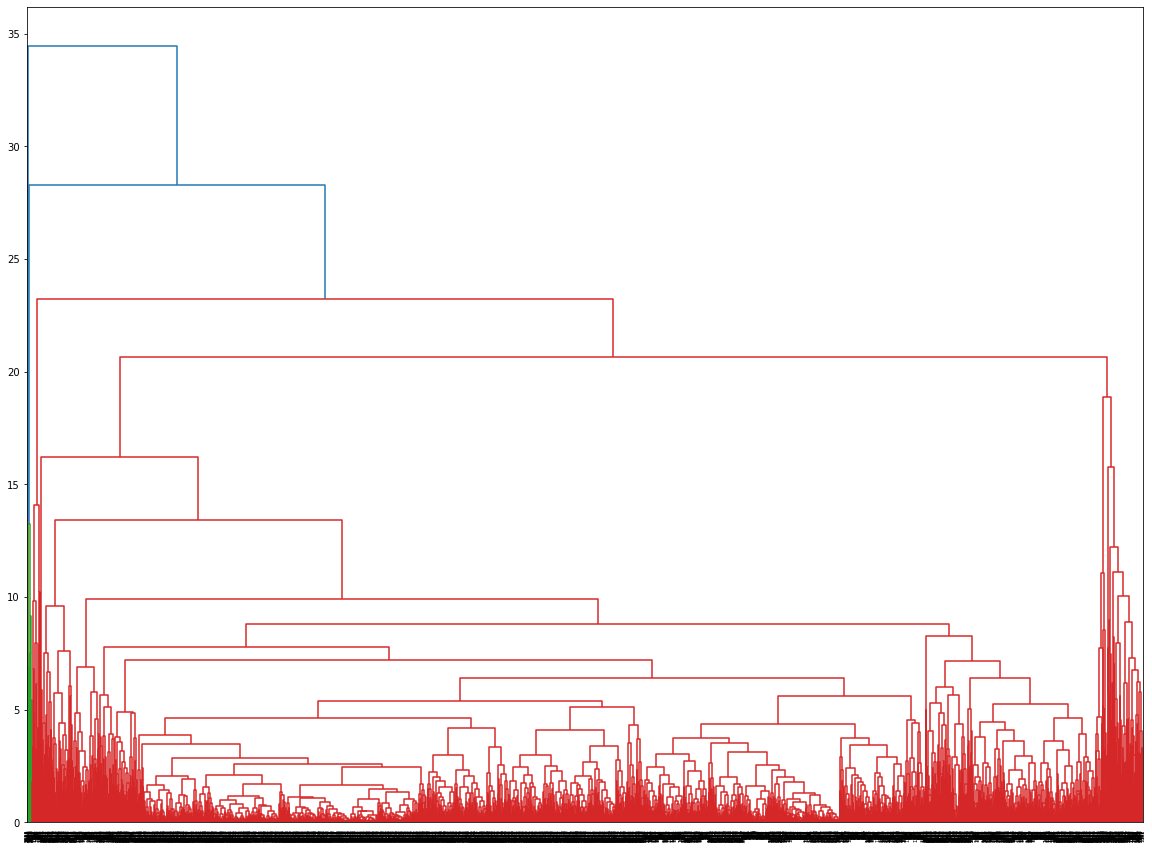

In [16]:
plt.figure(figsize=(20,15))
dendogram1= sch.dendrogram(sch.linkage(std_df, "complete"))

In [17]:
no_clusters= [2,3,4,5,6,7,8,9]
linkage=["ward", "complete", "average", "single"]
for num in no_clusters:
    for link in linkage:
        cluster= AgglomerativeClustering(n_clusters=num, linkage=link, affinity='euclidean')
        clus_label = cluster.fit_predict(std_df)
        silt_score= silhouette_score(std_df, clus_label)
        print(f"Silhouette score with clusters {num} and linkage {link} is {silt_score}")

Silhouette score with clusters 2 and linkage ward is 0.28926595242577247
Silhouette score with clusters 2 and linkage complete is 0.8111134025692677
Silhouette score with clusters 2 and linkage average is 0.8111134025692677
Silhouette score with clusters 2 and linkage single is 0.8562820070415407
Silhouette score with clusters 3 and linkage ward is 0.2940432062008608
Silhouette score with clusters 3 and linkage complete is 0.7760836053602842
Silhouette score with clusters 3 and linkage average is 0.7838667595062349
Silhouette score with clusters 3 and linkage single is 0.7350532148998382
Silhouette score with clusters 4 and linkage ward is 0.30814152852022786
Silhouette score with clusters 4 and linkage complete is 0.5985727763092806
Silhouette score with clusters 4 and linkage average is 0.7731120442583631
Silhouette score with clusters 4 and linkage single is 0.5380065449865503
Silhouette score with clusters 5 and linkage ward is 0.3098805307874414
Silhouette score with clusters 5 an

In [18]:
# selecting 5 number of clusters with linkage= Average

In [46]:
cluster_h_std= AgglomerativeClustering(n_clusters=5, linkage= 'ward')
clust_labels= cluster_h_std.fit_predict(std_df)
df1= df.copy()
df1["clust_labels"]=clust_labels
df1= pd.DataFrame(df1)
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust_labels
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


<AxesSubplot:xlabel='clust_labels', ylabel='count'>

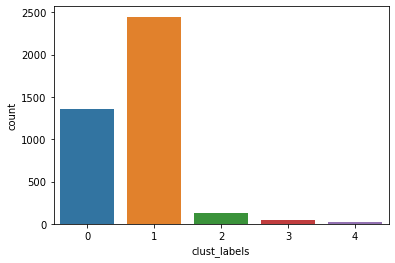

In [47]:
sns.countplot(x="clust_labels", data=df1)

# appying PCA on Standardized data 

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=0.97)
pca_std=pca.fit_transform(std_df)

In [23]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29867646, 0.45577273, 0.55165212, 0.64340608, 0.7306972 ,
       0.81362088, 0.88696119, 0.94337593, 0.97612501])

In [24]:
no_clusters= [2,3,4,5,6,7,8,9]
linkage=["ward", "complete", "average", "single"]
for num in no_clusters:
    for link in linkage:
        cluster= AgglomerativeClustering(n_clusters=num, linkage=link, affinity='euclidean')
        clus_label = cluster.fit_predict(pca_std)
        silt_score= silhouette_score(pca_std, clus_label)
        print(f"Silhouette score with clusters {num} and linkage {link} is {silt_score}")

Silhouette score with clusters 2 and linkage ward is 0.19974848194356423
Silhouette score with clusters 2 and linkage complete is 0.8108872970217894
Silhouette score with clusters 2 and linkage average is 0.8108872970217894
Silhouette score with clusters 2 and linkage single is 0.738348693430483
Silhouette score with clusters 3 and linkage ward is 0.2111738156170389
Silhouette score with clusters 3 and linkage complete is 0.7784326687701915
Silhouette score with clusters 3 and linkage average is 0.7858157031588872
Silhouette score with clusters 3 and linkage single is 0.7380711786432604
Silhouette score with clusters 4 and linkage ward is 0.2151215868832396
Silhouette score with clusters 4 and linkage complete is 0.6685647808748002
Silhouette score with clusters 4 and linkage average is 0.7754755890058267
Silhouette score with clusters 4 and linkage single is 0.5432817053419747
Silhouette score with clusters 5 and linkage ward is 0.22383489323765093
Silhouette score with clusters 5 and

In [25]:
cluster_pca_std= AgglomerativeClustering(n_clusters=5, linkage= 'average')
clust_labels= cluster_pca_std.fit_predict(pca_std)
df2= df.copy()
df2["clust_labels"]=clust_labels
df2= pd.DataFrame(df2)
df2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust_labels
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


<AxesSubplot:xlabel='clust_labels', ylabel='count'>

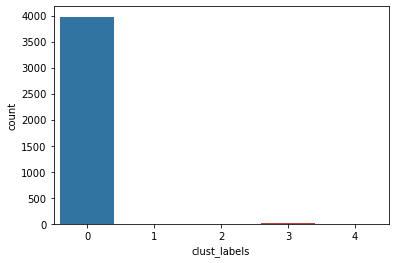

In [26]:
sns.countplot(x="clust_labels", data=df2)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
minmax_df= MinMaxScaler().fit_transform(df)
minmax_df= pd.DataFrame(minmax_df)
minmax_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [29]:
no_clusters= [2,3,4,5,6,7,8,9]
linkage=["ward", "complete", "average", "single"]
for num in no_clusters:
    for link in linkage:
        cluster= AgglomerativeClustering(n_clusters=num, linkage=link, affinity='euclidean')
        clus_label = cluster.fit_predict(minmax_df)
        silt_score= silhouette_score(minmax_df, clus_label)
        print(f"Silhouette score with clusters {num} and linkage {link} is {silt_score}")

Silhouette score with clusters 2 and linkage ward is 0.535930510919477
Silhouette score with clusters 2 and linkage complete is 0.47040913679492186
Silhouette score with clusters 2 and linkage average is 0.47040913679492186
Silhouette score with clusters 2 and linkage single is 0.535930510919477
Silhouette score with clusters 3 and linkage ward is 0.43550164891825044
Silhouette score with clusters 3 and linkage complete is 0.5318787367232326
Silhouette score with clusters 3 and linkage average is 0.39619766243707655
Silhouette score with clusters 3 and linkage single is 0.5351606918177734
Silhouette score with clusters 4 and linkage ward is 0.42494300944261365
Silhouette score with clusters 4 and linkage complete is 0.46459708515197673
Silhouette score with clusters 4 and linkage average is 0.5286018409871408
Silhouette score with clusters 4 and linkage single is 0.48129679558120275
Silhouette score with clusters 5 and linkage ward is 0.3762586351398372
Silhouette score with clusters 5

In [52]:
cluster_pca_std= AgglomerativeClustering(n_clusters=5, linkage= 'ward')
clust_labels= cluster_pca_std.fit_predict(minmax_df)
df3= df.copy()
df3["clust_labels"]=clust_labels
df3= pd.DataFrame(df3)
df3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust_labels
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


<AxesSubplot:xlabel='clust_labels', ylabel='count'>

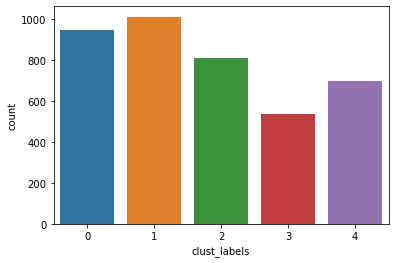

In [53]:
sns.countplot(x="clust_labels", data=df3)